In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load playlist data from drive

data = pd.read_csv('/content/drive/MyDrive/Analytics Project/Data/Complete Data/FINAL_RAW_DF.csv')
data_raw = data.copy()
data['release_date'] = data['release_date'].astype('datetime64[ns]')
data['release_date'] = data['release_date'].dt.year
playlist = pd.read_csv('/content/drive/MyDrive/Analytics Project/Initial Model/playlist_df _TRIAL.csv')
playlist['release_date'] = playlist['release_date'].astype('datetime64[ns]')
playlist['release_date'] = playlist['release_date'].dt.year

# load playlist concatenated dataset

playlist_concat_df = pd.read_csv('/content/drive/MyDrive/Analytics Project/Initial Model/training_data_df_TRIAL.csv')
# set songs in playlist to one and songs not in playlist to 0 ---> this is pur target variable

playlist_track_ids = playlist['track_id'].tolist()
playlist_concat_df['in_playlist'] = playlist_concat_df['track_id'].apply(lambda x: 1 if x in playlist_track_ids else 0)

playlist_concat_df

In [ ]:
playlist_concat_df['release_date'] = playlist_concat_df['release_date'].astype('datetime64[ns]')
playlist_concat_df['release_date'] = playlist_concat_df['release_date'].dt.year

In [ ]:
X_vals = playlist_concat_df.drop(['track_id', 'track_name', 'artist_name', 'album', 'uri', 'type', 'id', 'track_href', 'analysis_url', 'in_playlist'], axis = 1)
y_vals = playlist_concat_df['in_playlist']

In [ ]:
X_vals.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vals, y_vals, test_size=0.3, random_state=21)

In [ ]:
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Importance of each feature in Dataset')
plt.xlabel('Feature')
plt.ylabel('Importance Measure')
plt.show()

In [ ]:
# Sort feature importances in ascending order
sorted_idx = np.argsort(importance)

# Get the indices of the 5 least important features
sorted_idx[:5]




In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# Fit the Decision Tree Classifier
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Get feature importances
importance = dt.feature_importances_

# Display feature importance scores
for i, v in enumerate(importance):
    print(f'Feature: {i}, Score: {v:.5f}')

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Importance of each feature in Dataset')
plt.xlabel('Feature')
plt.ylabel('Importance Measure')
plt.show()

# Sort feature importances in ascending order
sorted_idx = np.argsort(importance)

# Get the indices of the 5 least important features
least_important_features = sorted_idx[:8]
print("Indices of the 5 least important features:", least_important_features)

# Convert X_train and X_test to DataFrames
X_train_df = pd.DataFrame(X_train, columns=[f'Feature_{i}' for i in range(X_train.shape[1])])
X_test_df = pd.DataFrame(X_test, columns=[f'Feature_{i}' for i in range(X_test.shape[1])])

# Drop the 5 least important features
X_train_reduced_df = X_train_df.drop(X_train_df.columns[least_important_features], axis=1)
X_test_reduced_df = X_test_df.drop(X_test_df.columns[least_important_features], axis=1)

# Convert back to NumPy arrays
X_train_reduced = X_train_reduced_df.to_numpy()
X_test_reduced = X_test_reduced_df.to_numpy()

print("Reduced training dataset shape:", X_train_reduced.shape)
print("Reduced testing dataset shape:", X_test_reduced.shape)


In [ ]:
X_train_reduced.shape

(991, 7)

Reduced Feature: 0, Score: 0.06517
Reduced Feature: 1, Score: 0.06773
Reduced Feature: 2, Score: 0.02885
Reduced Feature: 3, Score: 0.12223
Reduced Feature: 4, Score: 0.05857
Reduced Feature: 5, Score: 0.05582
Reduced Feature: 6, Score: 0.60162


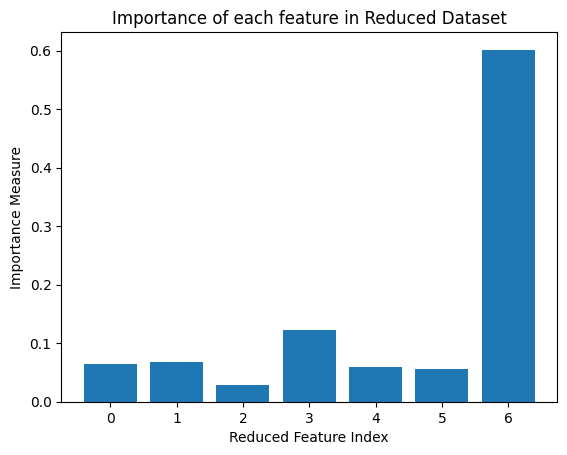

In [ ]:
# Fit the Decision Tree Classifier on the reduced dataset
dt_reduced = tree.DecisionTreeClassifier()
dt_reduced.fit(X_train_reduced, y_train)

# Get feature importances for the reduced dataset
importance_reduced = dt_reduced.feature_importances_

# Display feature importance scores for the reduced dataset
for i, v in enumerate(importance_reduced):
    print(f'Reduced Feature: {i}, Score: {v:.5f}')

# Plot feature importance for the reduced dataset
plt.bar([x for x in range(len(importance_reduced))], importance_reduced)
plt.title('Importance of each feature in Reduced Dataset')
plt.xlabel('Reduced Feature Index')
plt.ylabel('Importance Measure')
plt.show()


In [ ]:
X_train = X_train_reduced
X_test = X_test_reduced

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

DTC = DecisionTreeClassifier()

distributions = {'max_depth': randint(1, 10), 'min_samples_split': randint(2, 50)}
DT = RandomizedSearchCV(DTC, distributions, cv = 5, verbose = 2, random_state = 20, n_jobs=-1, return_train_score = True, n_iter = 500)
searchDT = DT.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


In [9]:
print('Best performance using decision tree is '+ str(searchDT.best_score_) + ' with a max depth of ' + str(searchDT.best_params_['max_depth']) + ' and a min samples split of '+ str(searchDT.best_params_['min_samples_split']) )

Best performance using decision tree is 0.8627480838536116 with a max depth of 1 and a min samples split of 43


In [84]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
DTC = DecisionTreeClassifier

best_clf = DTC(max_depth = searchDT.best_params_['max_depth'], min_samples_split = searchDT.best_params_['min_samples_split'])
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


test accuracy:  0.5035294117647059
Precision:  0.0
Recall 0.0
Fall-out rate:  0.004651162790697674
F1 score nan


<ipython-input-11-996f1c7cb30e>:16: RuntimeWarning: invalid value encountered in scalar divide
  print('F1 score', 2*((recall*precision)/(recall + precision)))


Text(50.722222222222214, 0.5, 'Actual')

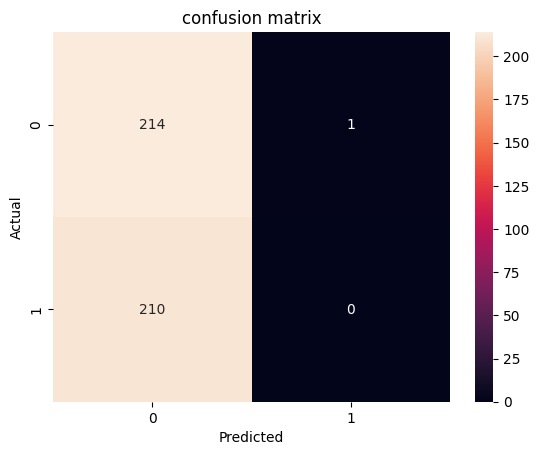

In [11]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

FP = cm[0, 1]
TN = cm[0, 0]

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print('test accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall', metrics.recall_score(y_test, y_pred))
print('Fall-out rate: ', FP / (FP + TN))
print('F1 score', 2*((recall*precision)/(recall + precision)))

sns.heatmap(data = cm, annot = True, fmt='.3g')
plt.title('confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')